# Linear Regression

In [1]:
# Kütüphanelerin import edilmesi
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

In [3]:
# Verileri bir sözlük şeklinde tanımlıyoruz
data = {
    'Deneyim Yılı (x)': [5, 7, 3, 3, 2, 7, 3, 10, 6, 4, 8, 1, 1, 9, 1],
    'Maaş (y)': [600, 900, 550, 500, 400, 950, 540, 1200, 900, 550, 1100, 460, 400, 1000, 380]
}

# Verileri bir DataFrame'e dönüştürüyoruz
df = pd.DataFrame(data)

# DataFrame'i görüntüleme
df

,Deneyim Yılı (x),Maaş (y)
0,5,600
1,7,900
2,3,550
3,3,500
4,2,400
5,7,950
6,3,540
7,10,1200
8,6,900
9,4,550


In [4]:
# df'in tipi
type(df)

pandas.core.frame.DataFrame

In [2]:
# 1-Verilen bias ve weight’e göre doğrusal regresyon model denklemini oluşturunuz. Bias = 275, Weight= 90 (y’ = b+wx)

# y_hat = 275 + (90 * x)

In [5]:
# 2- Oluşturduğunuz model denklemine göre tablodaki tüm deneyim yılları için maaş tahmini yapınız.

# Girdileri (X) ve çıktıları (y) belirle
X = df[['Deneyim Yılı (x)']]  # Girdiler (Deneyim Yılı)
y = df['Maaş (y)']  # Çıktılar (Maaş)


In [6]:
X

,Deneyim Yılı (x)
0,5
1,7
2,3
3,3
4,2
5,7
6,3
7,10
8,6
9,4


In [7]:
y

0      600
1      900
2      550
3      500
4      400
5      950
6      540
7     1200
8      900
9      550
10    1100
11     460
12     400
13    1000
14     380
Name: Maaş (y), dtype: int64

In [8]:
# Doğrusal regresyon modelini oluştur ve eğit
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [9]:
# Modelin katsayılarını yazdır
print(f"Y-intercept (b0): {model.intercept_}")
print(f"Slope (b1): {model.coef_[0]}")

Y-intercept (b0): 274.3560209424085
Slope (b1): 90.2094240837696


In [10]:
# Tahmin edilen maaşlar
y_pred = model.predict(X)

df["y_pred"] = y_pred

df


,Deneyim Yılı (x),Maaş (y),y_pred
0,5,600,725.403141
1,7,900,905.821990
2,3,550,544.984293
3,3,500,544.984293
4,2,400,454.774869
5,7,950,905.821990
6,3,540,544.984293
7,10,1200,1176.450262
8,6,900,815.612565
9,4,550,635.193717


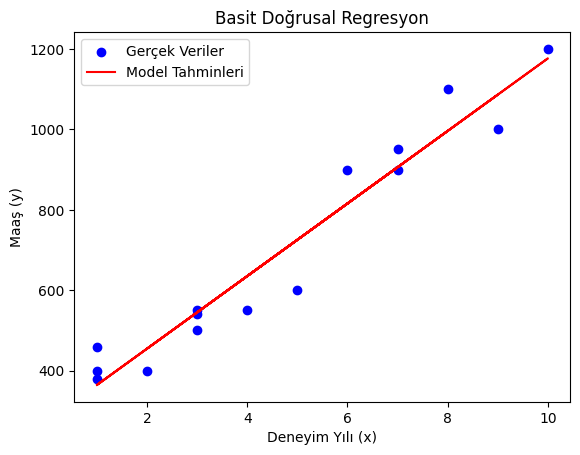

In [11]:
# Gerçek ve tahmin edilen verileri görselleştir
plt.scatter(X, y, color='blue', label='Gerçek Veriler')
plt.plot(X, y_pred, color='red', label='Model Tahminleri')
plt.xlabel('Deneyim Yılı (x)')
plt.ylabel('Maaş (y)')
plt.title('Basit Doğrusal Regresyon')
plt.legend()
plt.show()


In [12]:
# 3-Modelin başarısını ölçmek için MSE, RMSE, MAE skorlarını hesaplayınız

# MSE, RMSE, MAE hesaplama
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)

# Sonuçları yazdır
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")


Mean Squared Error (MSE): 4437.849912739966
Root Mean Squared Error (RMSE): 66.61718931882346
Mean Absolute Error (MAE): 54.320418848167535


In [13]:
# MSE, RMSE, MAE'nin veri setine eklenmesi
df["MSE"] = mse
df["RMSE"] = rmse
df["MAE"] = mae

df


,Deneyim Yılı (x),Maaş (y),y_pred,MSE,RMSE,MAE
0,5,600,725.403141,4437.849913,66.617189,54.320419
1,7,900,905.821990,4437.849913,66.617189,54.320419
2,3,550,544.984293,4437.849913,66.617189,54.320419
3,3,500,544.984293,4437.849913,66.617189,54.320419
4,2,400,454.774869,4437.849913,66.617189,54.320419
5,7,950,905.821990,4437.849913,66.617189,54.320419
6,3,540,544.984293,4437.849913,66.617189,54.320419
7,10,1200,1176.450262,4437.849913,66.617189,54.320419
8,6,900,815.612565,4437.849913,66.617189,54.320419
9,4,550,635.193717,4437.849913,66.617189,54.320419


In [15]:
# MSE, RMSE, MAE'yi manuel olarak hesaplama

n = len(y)  # Veri sayısı

# Gerçek değerler ile tahmin edilen değerler arasındaki farkları hesapla
errors = y - y_pred

# MSE hesaplama
mse_manual = (errors ** 2).sum() / n

# RMSE hesaplama
rmse_manual = np.sqrt(mse_manual)

# MAE hesaplama
mae_manual = np.abs(errors).sum() / n

# Sonuçları yazdır
print(f"Manuel Mean Squared Error (MSE): {mse_manual}")
print(f"Mean Squared Error (MSE): {mse}")
print("#"*50)
print(f"Manuel Root Mean Squared Error (RMSE): {rmse_manual}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print("#"*50)
print(f"Manuel Mean Absolute Error (MAE): {mae_manual}")
print(f"Mean Absolute Error (MAE): {mae}")


Manuel Mean Squared Error (MSE): 4437.849912739966
Mean Squared Error (MSE): 4437.849912739966
##################################################
Manuel Root Mean Squared Error (RMSE): 66.61718931882346
Root Mean Squared Error (RMSE): 66.61718931882346
##################################################
Manuel Mean Absolute Error (MAE): 54.320418848167535
Mean Absolute Error (MAE): 54.320418848167535


In [16]:
# MSE_MANUAL, RMSE_MANUAL ve MAE_MANUAL'in veri setine eklenmesi
df["MSE_MANUAL"] = mse_manual
df["RMSE_MANUAL"] = rmse_manual
df["MAE_MANUAL"] = mae_manual

df


,Deneyim Yılı (x),Maaş (y),y_pred,MSE,RMSE,MAE,MSE_MANUAL,RMSE_MANUAL,MAE_MANUAL
0,5,600,725.403141,4437.849913,66.617189,54.320419,4437.849913,66.617189,54.320419
1,7,900,905.821990,4437.849913,66.617189,54.320419,4437.849913,66.617189,54.320419
2,3,550,544.984293,4437.849913,66.617189,54.320419,4437.849913,66.617189,54.320419
3,3,500,544.984293,4437.849913,66.617189,54.320419,4437.849913,66.617189,54.320419
4,2,400,454.774869,4437.849913,66.617189,54.320419,4437.849913,66.617189,54.320419
5,7,950,905.821990,4437.849913,66.617189,54.320419,4437.849913,66.617189,54.320419
6,3,540,544.984293,4437.849913,66.617189,54.320419,4437.849913,66.617189,54.320419
7,10,1200,1176.450262,4437.849913,66.617189,54.320419,4437.849913,66.617189,54.320419
8,6,900,815.612565,4437.849913,66.617189,54.320419,4437.849913,66.617189,54.320419
9,4,550,635.193717,4437.849913,66.617189,54.320419,4437.849913,66.617189,54.320419


In [17]:
# Projenin Fonksiyonlaştırılması

In [21]:
# Veriyi oluşturan fonksiyon
def create_dataframe():
    data = {
        'Deneyim Yılı (x)': [5, 7, 3, 3, 2, 7, 3, 10, 6, 4, 8, 1, 1, 9, 1],
        'Maaş (y)': [600, 900, 550, 500, 400, 950, 540, 1200, 900, 550, 1100, 460, 400, 1000, 380]
    }
    df = pd.DataFrame(data)
    return df

# Doğrusal regresyon modelini oluşturan ve tahminler yapan fonksiyon
def linear_regression_model(df):
    X = df[['Deneyim Yılı (x)']]  # Girdiler
    y = df['Maaş (y)']  # Çıktılar

    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    df['y_pred'] = y_pred
    return model, df

# MSE, RMSE, MAE hesaplayan fonksiyon (otomatik)
def calculate_metrics_auto(y, y_pred):
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)
    return mse, rmse, mae

# MSE, RMSE, MAE hesaplayan fonksiyon (manuel)
def calculate_metrics_manual(y, y_pred):
    n = len(y)
    errors = y - y_pred

    mse_manual = (errors ** 2).sum() / n
    rmse_manual = np.sqrt(mse_manual)
    mae_manual = np.abs(errors).sum() / n
    return mse_manual, rmse_manual, mae_manual

# Grafik çizen fonksiyon
def plot_results(X, y, y_pred):
    plt.scatter(X, y, color='blue', label='Gerçek Veriler')
    plt.plot(X, y_pred, color='red', label='Model Tahminleri')
    plt.xlabel('Deneyim Yılı (x)')
    plt.ylabel('Maaş (y)')
    plt.title('Basit Doğrusal Regresyon')
    plt.legend()
    plt.show()

# Tüm işlemleri yürüten ana fonksiyon
def main():
    # Veriyi oluştur
    df = create_dataframe()

    # Model oluştur ve tahminler yap
    model, df = linear_regression_model(df)
    print(f"Y-intercept (b0): {model.intercept_}")
    print(f"Slope (b1): {model.coef_[0]}")

    # Otomatik metrikleri hesapla
    mse, rmse, mae = calculate_metrics_auto(df['Maaş (y)'], df['y_pred'])
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Mean Absolute Error (MAE): {mae}")

    # Manuel metrikleri hesapla
    mse_manual, rmse_manual, mae_manual = calculate_metrics_manual(df['Maaş (y)'], df['y_pred'])
    print(f"Manuel Mean Squared Error (MSE_MANUAL): {mse_manual}")
    print(f"Manuel Root Mean Squared Error (RMSE_MANUAL): {rmse_manual}")
    print(f"Manuel Mean Absolute Error (MAE_MANUAL): {mae_manual}")

    # Metrikleri DataFrame'e ekle
    df['MSE'] = mse
    df['RMSE'] = rmse
    df['MAE'] = mae
    df['MSE_MANUAL'] = mse_manual
    df['RMSE_MANUAL'] = rmse_manual
    df['MAE_MANUAL'] = mae_manual

    # Sonuçları görselleştir
    plot_results(df[['Deneyim Yılı (x)']], df['Maaş (y)'], df['y_pred'])

    # DataFrame'i döndür
    return df


Y-intercept (b0): 274.3560209424085
Slope (b1): 90.2094240837696
Mean Squared Error (MSE): 4437.849912739966
Root Mean Squared Error (RMSE): 66.61718931882346
Mean Absolute Error (MAE): 54.320418848167535
Manuel Mean Squared Error (MSE_MANUAL): 4437.849912739966
Manuel Root Mean Squared Error (RMSE_MANUAL): 66.61718931882346
Manuel Mean Absolute Error (MAE_MANUAL): 54.320418848167535


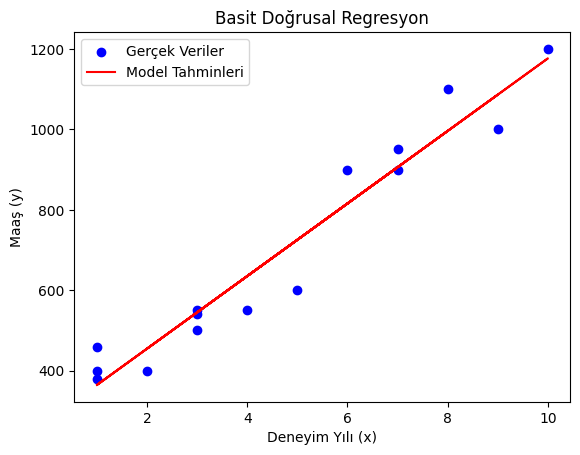

    Deneyim Yılı (x)  Maaş (y)       y_pred          MSE       RMSE        MAE   MSE_MANUAL  RMSE_MANUAL  MAE_MANUAL
0                  5       600   725.403141  4437.849913  66.617189  54.320419  4437.849913    66.617189   54.320419
1                  7       900   905.821990  4437.849913  66.617189  54.320419  4437.849913    66.617189   54.320419
2                  3       550   544.984293  4437.849913  66.617189  54.320419  4437.849913    66.617189   54.320419
3                  3       500   544.984293  4437.849913  66.617189  54.320419  4437.849913    66.617189   54.320419
4                  2       400   454.774869  4437.849913  66.617189  54.320419  4437.849913    66.617189   54.320419
5                  7       950   905.821990  4437.849913  66.617189  54.320419  4437.849913    66.617189   54.320419
6                  3       540   544.984293  4437.849913  66.617189  54.320419  4437.849913    66.617189   54.320419
7                 10      1200  1176.450262  4437.849913  66.617

In [22]:
# Ana fonksiyonu çalıştır
df_results = main()
print(df_results)